<a href="https://colab.research.google.com/github/AdarshShah/final-year-project/blob/master/notebooks/sepsis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import pandas as pd
import psycopg2
import getpass
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
from keras.models import Model, Sequential
from keras.layers import Dense, LeakyReLU
import matplotlib.pyplot as plt

/home/jay/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jay/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jay/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jay/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

In [3]:
path = '/home/jay/Desktop/final-year-project-master/dataset/dataset_sepsis.csv'
sepsis_dataset = pd.read_csv(path)

In [4]:
sepsis = sepsis_dataset[sepsis_dataset['sepsis_explicit']==1]
not_sepsis = sepsis_dataset[sepsis_dataset['sepsis_explicit']!=1]

In [5]:
sepsis['icustay_id'].count()

1538

In [6]:
not_sepsis['icustay_id'].count()

14000

In [7]:
X = sepsis_dataset.iloc[:,6:-2]
Y = sepsis_dataset.iloc[:,3]
X = MinMaxScaler().fit_transform(X.values)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [14]:
model = Sequential()
model.add(Dense(units=200,input_shape=(94,),activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=25,activation='relu'))
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               19000     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_15 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 130       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 45,561
Trainable params: 45,561
Non-trainable params: 0
__________________________________________________

In [15]:
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=100)

Train on 12430 samples, validate on 3108 samples
Epoch 1/100
12430/12430 [==============================] - 1s 75us/step - loss: 0.2987 - accuracy: 0.9003 - val_loss: 0.2875 - val_accuracy: 0.8983
Epoch 2/100
12430/12430 [==============================] - 1s 56us/step - loss: 0.2530 - accuracy: 0.9060 - val_loss: 0.2662 - val_accuracy: 0.9032
Epoch 3/100
12430/12430 [==============================] - 1s 59us/step - loss: 0.2446 - accuracy: 0.9122 - val_loss: 0.2648 - val_accuracy: 0.9051
Epoch 4/100
12430/12430 [==============================] - 1s 70us/step - loss: 0.2398 - accuracy: 0.9126 - val_loss: 0.2645 - val_accuracy: 0.9009
Epoch 5/100
12430/12430 [==============================] - 1s 74us/step - loss: 0.2357 - accuracy: 0.9146 - val_loss: 0.2589 - val_accuracy: 0.9060
Epoch 6/100
12430/12430 [==============================] - 1s 67us/step - loss: 0.2318 - accuracy: 0.9167 - val_loss: 0.2597 - val_accuracy: 0.9048
Epoch 7/100
12430/12430 [==============================] - 1s 6

Epoch 56/100
12430/12430 [==============================] - 1s 54us/step - loss: 0.1313 - accuracy: 0.9566 - val_loss: 0.3788 - val_accuracy: 0.9086
Epoch 57/100
12430/12430 [==============================] - 1s 53us/step - loss: 0.1299 - accuracy: 0.9582 - val_loss: 0.3926 - val_accuracy: 0.9151
Epoch 58/100
12430/12430 [==============================] - 1s 52us/step - loss: 0.1318 - accuracy: 0.9565 - val_loss: 0.3759 - val_accuracy: 0.9144
Epoch 59/100
12430/12430 [==============================] - 1s 52us/step - loss: 0.1300 - accuracy: 0.9581 - val_loss: 0.3821 - val_accuracy: 0.9077
Epoch 60/100
12430/12430 [==============================] - 1s 52us/step - loss: 0.1263 - accuracy: 0.9595 - val_loss: 0.3725 - val_accuracy: 0.9099
Epoch 61/100
12430/12430 [==============================] - 1s 52us/step - loss: 0.1297 - accuracy: 0.9567 - val_loss: 0.4026 - val_accuracy: 0.9134
Epoch 62/100
12430/12430 [==============================] - 1s 53us/step - loss: 0.1286 - accuracy: 0.9585

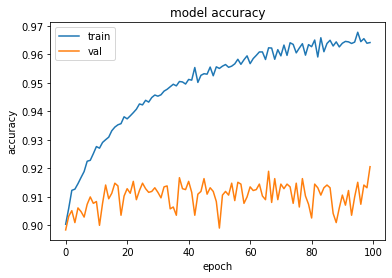

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
X = sepsis_dataset.iloc[:,6:-2]
y_true = sepsis_dataset.iloc[:,3]
X = MinMaxScaler().fit_transform(X.values)
y_pred = model.predict(X)
y_pred = np.round(y_pred)
print(confusion_matrix(y_true,y_pred))
print("f1_score\t:%f"%(f1_score(y_true,y_pred)))
print("recall_score\t:%f"%(recall_score(y_true,y_pred)))
print("precision_score\t:%f"%(precision_score(y_true,y_pred)))vfdsa

[[13959    41]
 [  595   943]]
f1_score	:0.747819
recall_score	:0.613134
precision_score	:0.958333


In [12]:
y_pred = sepsis_dataset['sepsis-3']
y_true = sepsis_dataset.iloc[:,3]
print(confusion_matrix(y_true,y_pred))
print("f1_score\t:%f"%(f1_score(y_true,y_pred)))
print("recall_score\t:%f"%(recall_score(y_true,y_pred)))
print("precision_score\t:%f"%(precision_score(y_true,y_pred))) 

KeyError: 'sepsis-3'